python -m venv venv
source venv/bin/activate
pip install pandas

In [12]:
import pandas
from csv import DictReader
import matplotlib.pyplot as plt

In [5]:
# data = pandas.read_csv('data.csv')
# file = open('data.csv', 'r')
# data = DictReader(file)
    # for row in data:
    #     print(row)

In [8]:
with open('data.csv', 'r', encoding='utf-8') as file:
    data = DictReader(file)
    
    cleaned_data = []
    for row in data:
        cleaned_row = {}
        for k, v in row.items():
            key = k.strip() if isinstance(k, str) else str(k)
            if isinstance(v, str):
                value = v.strip().replace('\xa0', '').replace(' ', '')
            elif isinstance(v, list):
                value = ''.join(v)  # склеиваем элементы списка в одну строку
            elif v is None:
                value = ''
            else:
                value = str(v).strip()
            cleaned_row[key] = value
        cleaned_data.append(cleaned_row)


In [20]:
import csv

salary_old = []
salary_new = []
all_count_old = []
all_count_new = []

with open('data.csv', 'r', encoding='utf-8') as file:
    reader = csv.DictReader(file)

    for row in reader:
        # strip() – удаляет пробелы по краям строк # isinstance() – проверяет, строка ли это
        # replace() – удаляет неразрывные пробелы и лишние символы
        cleaned_row = {
            (k.strip() if isinstance(k, str) else str(k) if k is not None else ''):
            (v.strip() if isinstance(v, str) else str(v) if v is not None else '')
            for k, v in row.items()
        }

        # next() с генератором – находит нужный ключ по части названия
        sales_key = next((k for k in cleaned_row if "продажи" in k.lower()), None)
        delivery_key = next((k for k in cleaned_row if "доставк" in k.lower()), None)
        upt_key = next((k for k in cleaned_row if "upt" in k.lower()), None)
        condition_key = next((k for k in cleaned_row if "услов" in k.lower()), None)

        if not all([sales_key, delivery_key, upt_key, condition_key]):
            continue  # пропустить, если чего-то не хватает

        # Очистка и подготовка значений
        # replace('\xa0', '') – удаляет неразрывные пробелы # int() / float() – преобразуют строки в числа
        sales_raw = cleaned_row.get(sales_key, "0").replace('\xa0', '').replace(' ', '')
        upt_raw = cleaned_row.get(upt_key, "0").replace('"', '').replace(' ', '').replace(',', '.')
        delivery = cleaned_row.get(delivery_key, "").lower()  # lower() – для удобного сравнения
        condition = cleaned_row.get(condition_key, "").lower()

        try:
            sales = int(sales_raw)
            upt = float(upt_raw)
        except ValueError:
            continue  # если число не читается – пропустить

        if "стандартная" in delivery or "самовывоз" in delivery:
            if "old" in condition:
                salary_old.append(sales)
                all_count_old.append(upt)
            elif "new" in condition:
                salary_new.append(sales)
                all_count_new.append(upt)

# Вывод с расчетами # sum() / len() – считаем среднее
# round() – округляем до двух знаков
print("OLD продажа:", salary_old)
print("OLD средняя продажа:", sum(salary_old) // len(salary_old) if salary_old else 0)
print("OLD средний UPT:", round(sum(all_count_old) / len(all_count_old), 2) if all_count_old else 0)

print("NEW продажа:", salary_new)
print("NEW средняя продажа:", sum(salary_new) // len(salary_new) if salary_new else 0)
print("NEW средний UPT:", round(sum(all_count_new) / len(all_count_new), 2) if all_count_new else 0)


OLD продажа: [3198, 2437, 3198, 3172, 998, 4847, 3738, 2875, 4997, 3016, 7797, 2197, 798, 1638, 1956, 2198, 998, 2497, 2497, 4505, 3072, 4198, 3200, 2895, 1198, 1397, 1296, 3198, 2198, 3044, 698, 3143, 4869, 2245, 9592, 4315, 3199, 598, 3079, 2633, 2797, 658, 3519, 1757, 1957, 3671, 2399, 1092, 2597, 2399, 2158, 1856, 4398, 1158, 4065, 758, 3628, 2126, 2248, 3199, 1058, 6195, 1757, 2879, 1482, 3199, 2448, 1007, 6798, 2399, 1758, 2798, 1156, 2158, 858, 3599, 3599, 1806, 858, 1158, 2247, 5096, 2646, 1976, 2117, 3095, 2398, 2021, 2399, 3199, 2399, 2158, 2597, 608, 2851, 3998, 1858, 758, 2048, 2027, 5994, 3199, 1058, 2378, 3597, 2496, 2298, 1882, 1458, 1457, 2799, 4171, 2548, 1757, 5598, 3098, 1207, 2799, 958, 958, 2007, 1157, 3398, 4398, 2158, 2617, 858, 2628, 5598, 2097, 1557, 1706, 1996, 958, 2046, 1558, 1108, 2399, 1158, 2798, 2158, 1357, 2399, 3062, 1058, 4198, 2466, 858, 2000, 4798, 3398, 1357, 1357, 5143, 9042, 2881, 1058, 2298, 2897, 2999, 2847, 1008, 2398, 1606, 1857, 1199, 1249, 

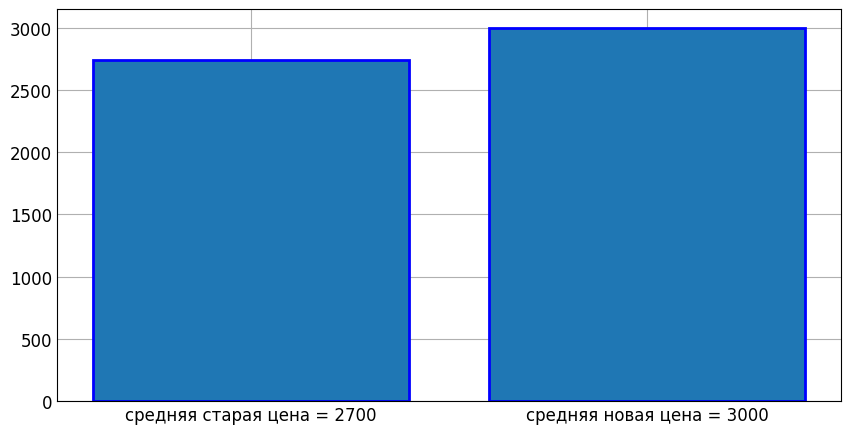

In [46]:
import numpy as np

plt.style.use('_mpl-gallery')

average_old_price = sum(salary_old) // len(salary_old) if salary_old else 0
average_new_price = sum(salary_new) // len(salary_new) if salary_new else 0
old_UPT = round(sum(all_count_old) / len(all_count_old), 2) if all_count_old else 0
new_UPT = round(sum(all_count_new) / len(all_count_new), 2) if all_count_new else 0

plt.rcParams.update({"font.size" : 12})
plt.figure( figsize=(8, 4))

plt.bar(["средняя старая цена = 2700", "средняя новая цена = 3000"],[average_old_price, average_new_price], width=0.8, edgecolor="blue", linewidth=2)


plt.show()

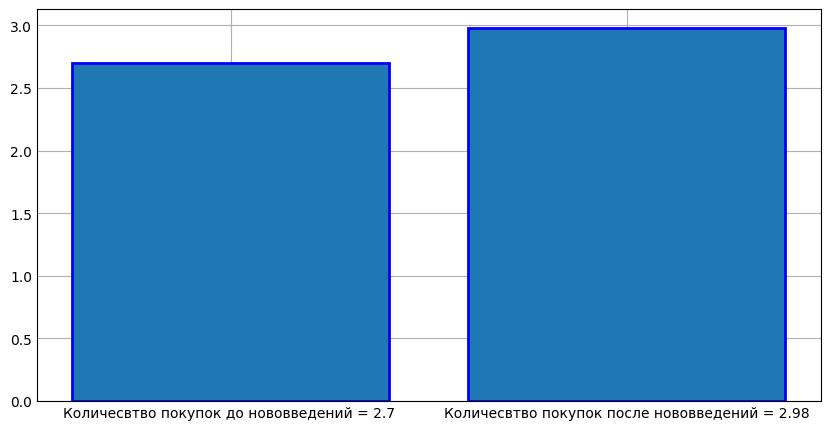

In [48]:
plt.rcParams.update({"font.size" : 10})
plt.figure( figsize=(8, 4))

plt.bar(["Количесвтво покупок до нововведений = 2.7 ", "Количесвтво покупок после нововведений = 2.98"],[old_UPT, new_UPT], width=0.8, edgecolor="blue", linewidth=2)

plt.show()

In [53]:
x = sum(all_count_old)
y = sum(all_count_new)


print(x,y)

31545.0 36855.0


In [55]:
for i in range(10):

    print(i)

0
1
2
3
4
5
6
7
8
9
